<a href="https://colab.research.google.com/github/theirfanrahman/HR_Employee_Attrition_Analysis_-_Classification/blob/master/HR_Employee_Attrition_Analysis_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imporitng library

In [4]:
#importing library
%matplotlib inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Reading dataset

In [5]:
#read dataset
df = pd.read_csv('/content/drive/My Drive/Statistics/Capstone Project/HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
#rows and columns
df.shape

(2940, 35)

As we can see dataset contains 2940 rows and 35 columns

In [7]:
#descripitive analysis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

Great, dataset does not contains any null values

#Data Visualization

No     2466
Yes     474
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


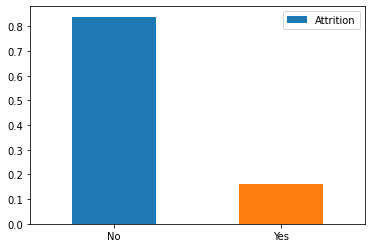

In [ ]:
#Dependent/target variable
print(df['Attrition'].value_counts())
print(df['Attrition'].value_counts(normalize=True))
df['Attrition'].value_counts(normalize=True).plot(kind='bar', rot=0, color=('C0','C1'), legend='Attrition')

Insights:


*   Majority of the employee not leaving the company 
*   Approx ~16% attrition happened
*   We can say the Traget class is imbalance because most of the record approx ~84% belongs to level 'NO'

##Let's visualize continuous variable/feature distribution

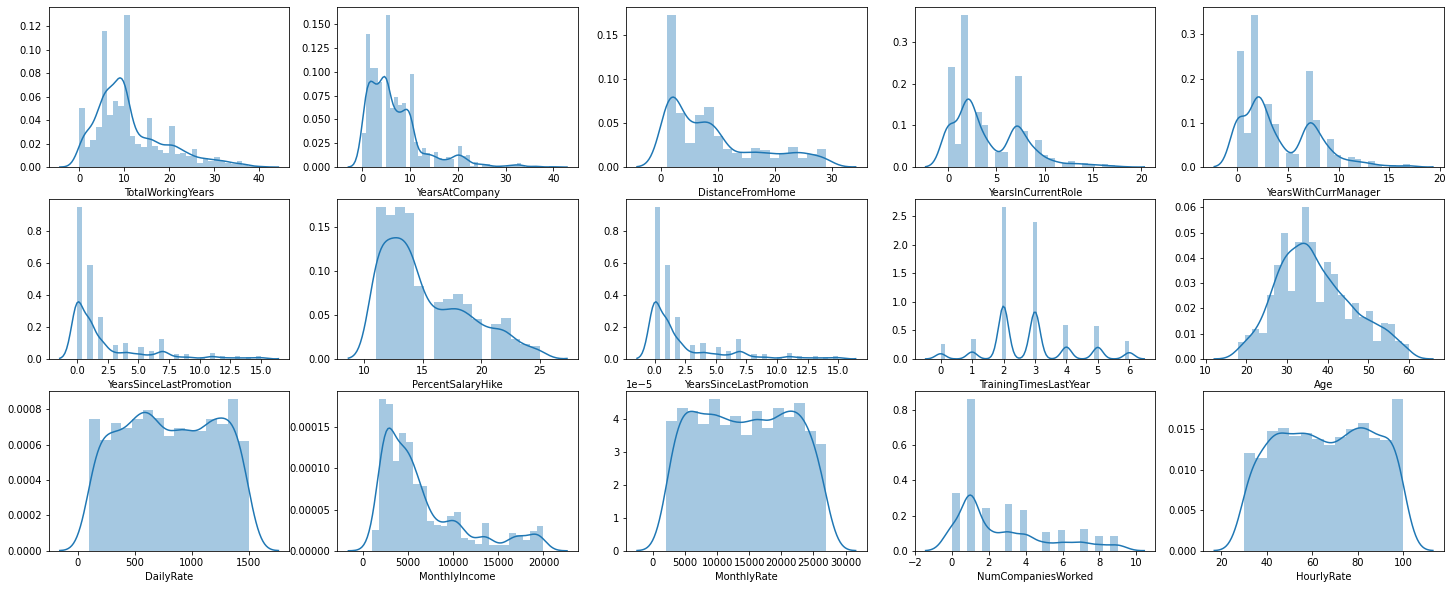

In [ ]:
fig,ax = plt.subplots(3,5, figsize=(25,10))      
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(df['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[0,3]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[0,4]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[1,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[1,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[1,3]) 
sns.distplot(df['Age'], ax = ax[1,4]) 
sns.distplot(df['DailyRate'], ax = ax[2,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[2,1])
sns.distplot(df['MonthlyRate'], ax = ax[2,2])
sns.distplot(df['NumCompaniesWorked'], ax = ax[2,3])
sns.distplot(df['HourlyRate'], ax = ax[2,4])
plt.show()

###Let's visualize categorical variables/features

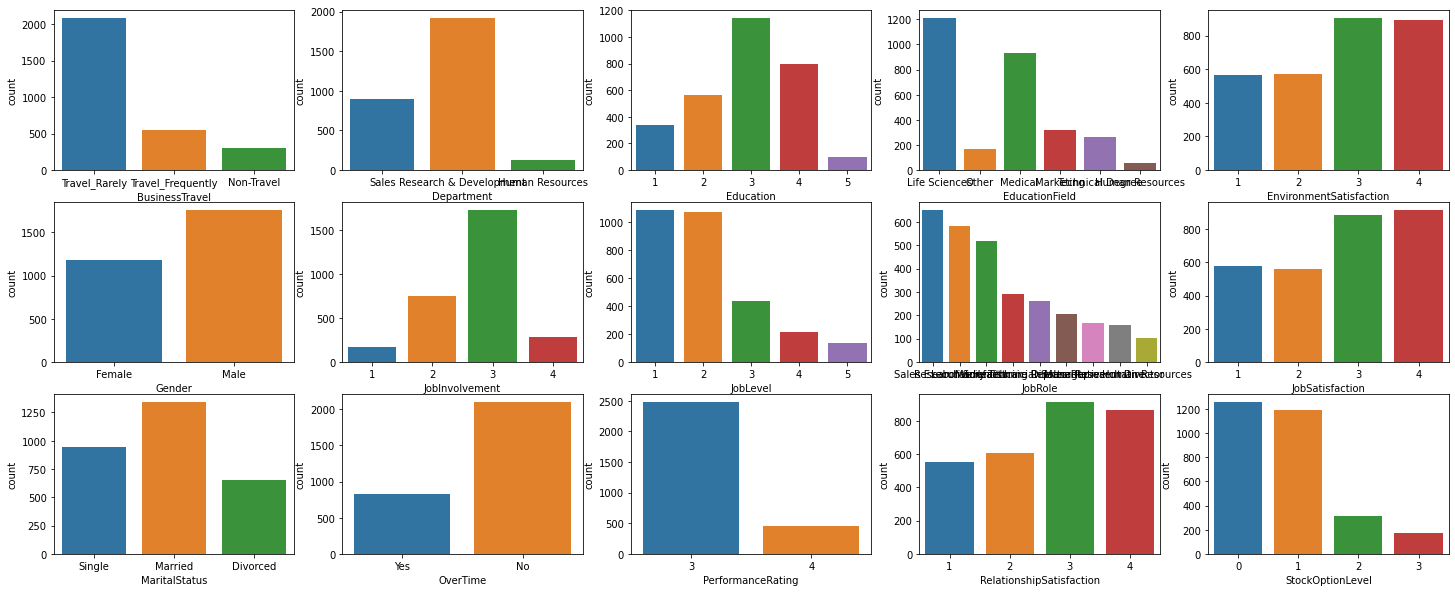

In [ ]:
fig,ax = plt.subplots(3,5, figsize=(25,10))      
sns.countplot(df['BusinessTravel'], ax = ax[0,0]) 
sns.countplot(df['Department'], ax = ax[0,1]) 
sns.countplot(df['Education'], ax = ax[0,2]) 
sns.countplot(df['EducationField'], ax = ax[0,3]) 
sns.countplot(df['EnvironmentSatisfaction'], ax = ax[0,4]) 
sns.countplot(df['Gender'], ax = ax[1,0]) 
sns.countplot(df['JobInvolvement'], ax = ax[1,1]) 
sns.countplot(df['JobLevel'], ax = ax[1,2]) 
sns.countplot(df['JobRole'], ax = ax[1,3]) 
sns.countplot(df['JobSatisfaction'], ax = ax[1,4]) 
sns.countplot(df['MaritalStatus'], ax = ax[2,0]) 
sns.countplot(df['OverTime'], ax = ax[2,1])
sns.countplot(df['PerformanceRating'], ax = ax[2,2])
sns.countplot(df['RelationshipSatisfaction'], ax = ax[2,3])
sns.countplot(df['StockOptionLevel'], ax = ax[2,4])
plt.show()

###Let's analyze independent features which have better effect on Target(Attrition) variable

### Age Feature

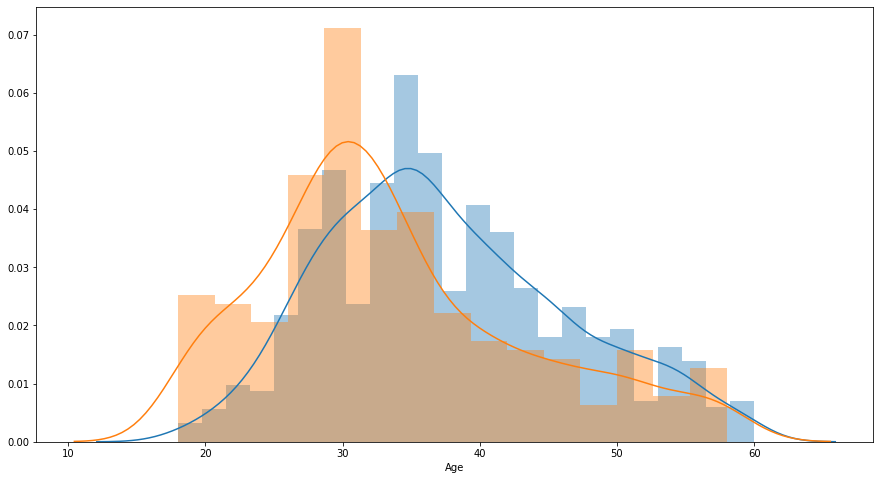

In [ ]:
attrn = df[df['Attrition']=='No']['Age']
attry = df[df['Attrition']=='Yes']['Age']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

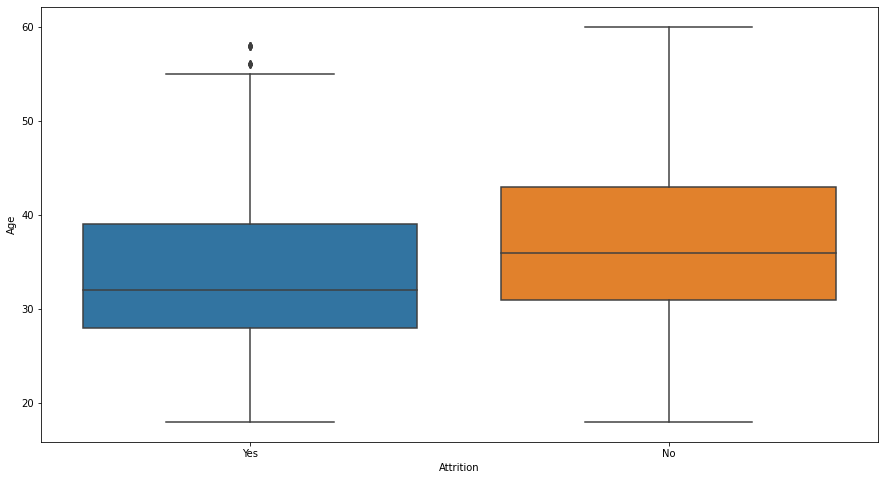

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot( x=df["Attrition"], y=df["Age"] )

Insights:

*   Attrition is high for those who have lesser age.
*   Age median for Attrion is also less and more for No Attrition.
*   Age feature seems to be a good effect on Attrition

In [ ]:
#creating a function to draw bar chart against target variable attrition

def drawBarChart(x):
  print(df[x].value_counts(), end='\n\n')
  print(pd.crosstab(columns=[df['Attrition']],index=[df[x]],margins=True,normalize='index',))
  sns.catplot(x, data=df, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

### BusinessTravel Feature

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569
All                0.838776  0.161224


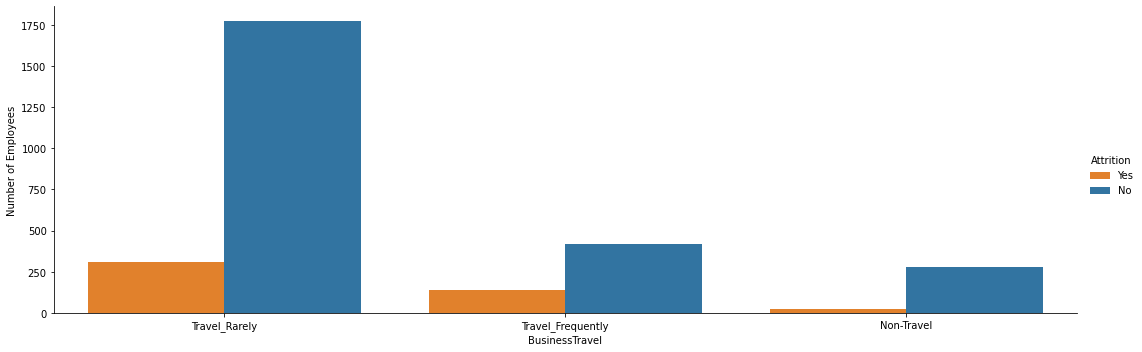

In [ ]:
drawBarChart('BusinessTravel')

Insights:

*   Highest attrition frequent travel. It could be also because of Frequent travel have high number of employee
*   It seems like employee don't prefer to travel



### Department Feature

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278
All                     0.838776  0.161224


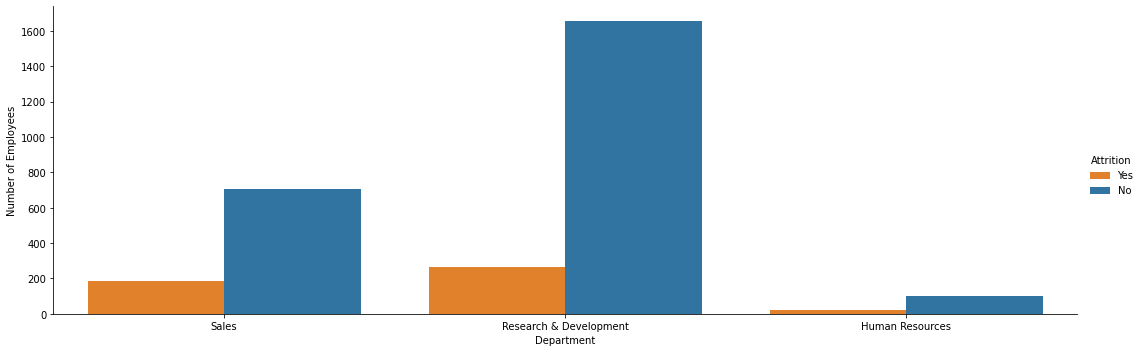

In [ ]:
drawBarChart('Department')

Insights:

*   Majority of employee are from R&D department
*   Attrition is also more in R&D. It could be also because of R&D have high number of employee
*   Sales Department have more Attrition if compare thee employee with R&D

### EducationField Feature

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

Attrition               No       Yes
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424
All               0.838776  0.161224


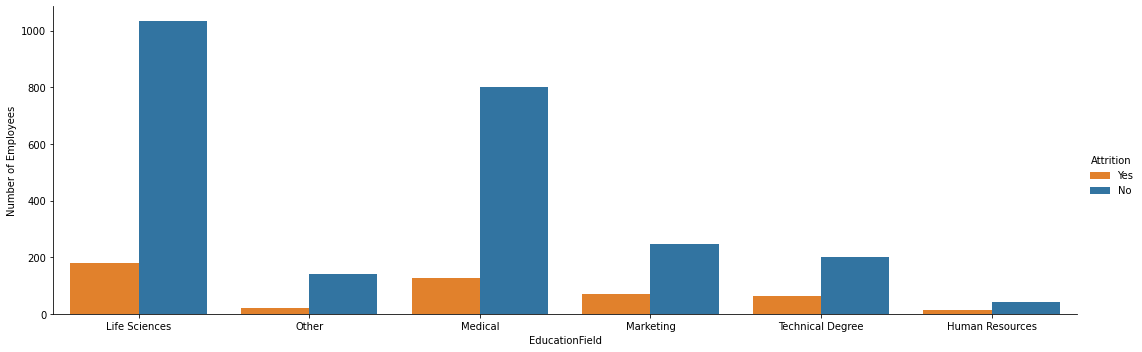

In [ ]:
drawBarChart('EducationField')

Insights:

*   Majority of employee are from Life Science and Medical but Attririon rate is less
*   Atttrition rate are high in Human Resources followed by Technical degree



### Gender Feature

Male      1764
Female    1176
Name: Gender, dtype: int64

Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068
All        0.838776  0.161224


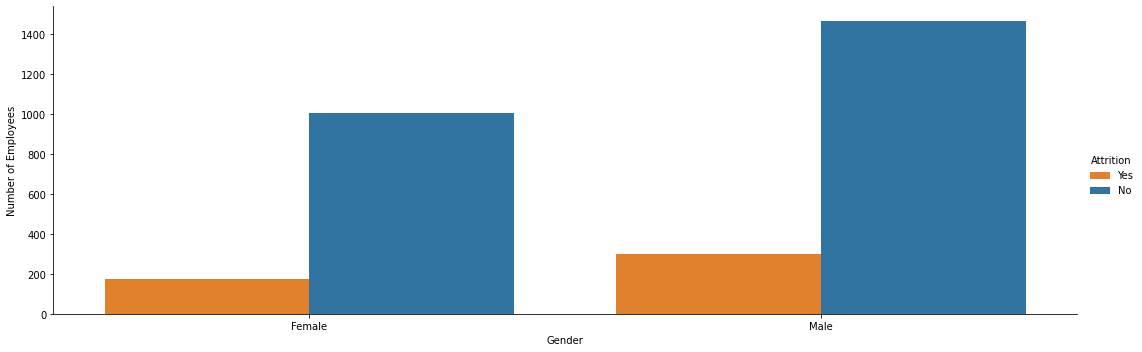

In [ ]:
drawBarChart('Gender')

Insights:

*   Attrition Rate are very close for both class of Gender gender
*   Gendter features doesn't play any vital role in Attrition

### Job Role Feature

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590
All                        0.838776  0.161224


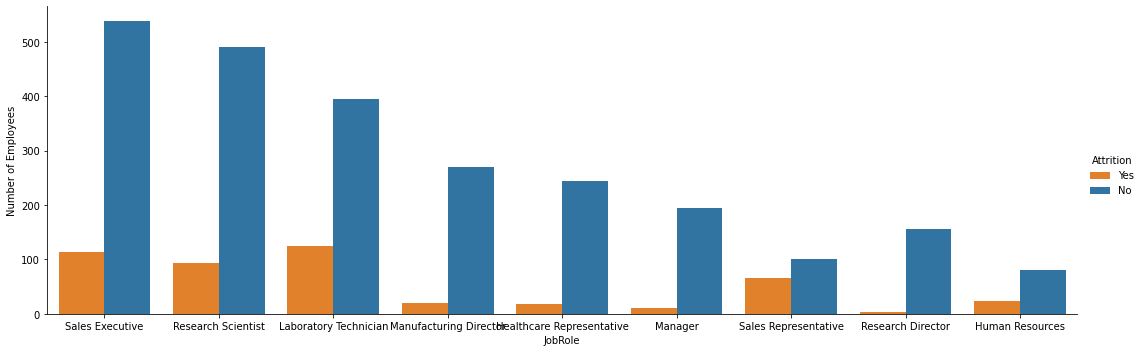

In [ ]:
drawBarChart('JobRole')

Insights:

*   Highest Attrtion rate are in Sales Represetative i.e. approx ~40% followed by Laboratory Technician, Human Resources
*   Attrition Rate is high in lower role like sales executives, research sceintist etc.



### Marital Status Feature

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64

Attrition            No       Yes
MaritalStatus                    
Divorced       0.899083  0.100917
Married        0.875186  0.124814
Single         0.744681  0.255319
All            0.838776  0.161224


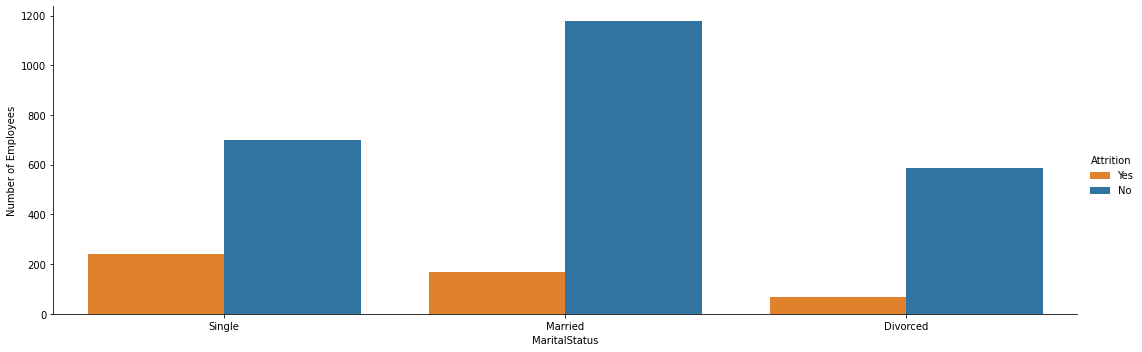

In [ ]:
drawBarChart('MaritalStatus')

Insights:

*   Attrition rate of single is high, it could they don't have any responsibilty
*   Maried and divorced don't change frequetly.

### Overtime Feature

No     2108
Yes     832
Name: OverTime, dtype: int64

Attrition        No       Yes
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288
All        0.838776  0.161224


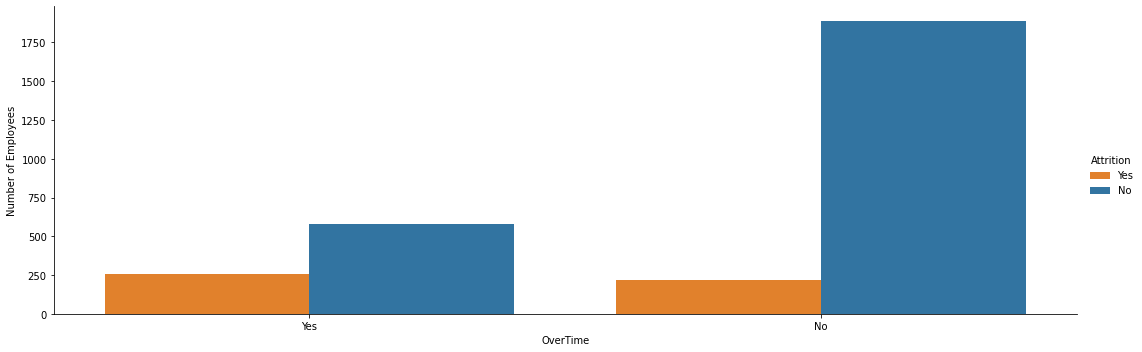

In [ ]:
#OverTime feature
drawBarChart('OverTime')

Insights:

*   Attrition is very high for overtime employee. Employees don't want to do overtime, thus attrition is high
*   Overtime plays a very good role in Attrition 



### Hourly Rate Feature

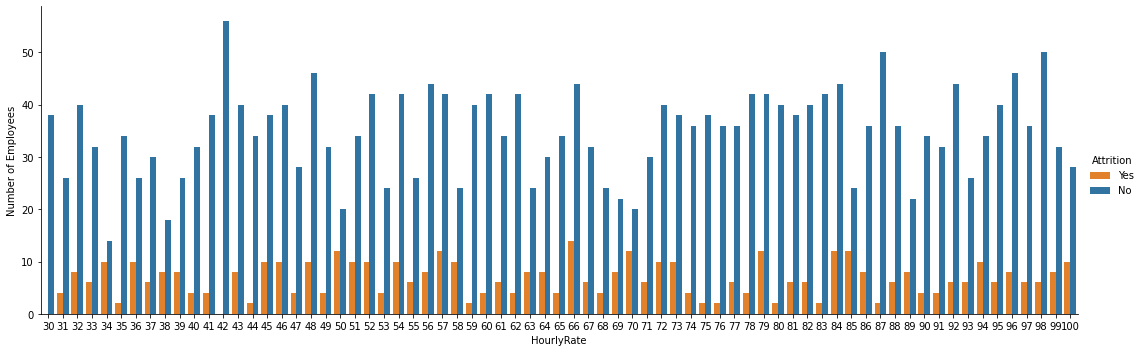

In [ ]:
sns.catplot('HourlyRate', data=df, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

chart doen't show much insight. let's check mean and standard deviation.

In [ ]:
#Hourly rate mean and standard deviation
print(df.HourlyRate.mean())
print(np.std(df.HourlyRate))

65.89115646258503
20.322511646324003


In [ ]:
#Hourly rate mean and standard deviation if attrition is Yes
print(df[df['Attrition']=='Yes']['HourlyRate'].mean())
print(np.std(df[df['Attrition']=='Yes']['HourlyRate']))

65.57383966244726
20.05750780715809


In [ ]:
#Hourly rate mean and standard deviation if attrition is No
print(df[df['Attrition']=='No']['HourlyRate'].mean())
print(np.std(df[df['Attrition']=='No']['HourlyRate']))

65.9521492295215
20.37248786486743


Insight:

*   As we can Hourly rate have similar distribution for both Attrition classes because mean and standard deviation is very similar
*   It seems to have very little effect on Attrition



### Environment Satisfaction Feature

3    906
4    892
2    574
1    568
Name: EnvironmentSatisfaction, dtype: int64

Attrition                      No       Yes
EnvironmentSatisfaction                    
1                        0.746479  0.253521
2                        0.850174  0.149826
3                        0.863135  0.136865
4                        0.865471  0.134529
All                      0.838776  0.161224


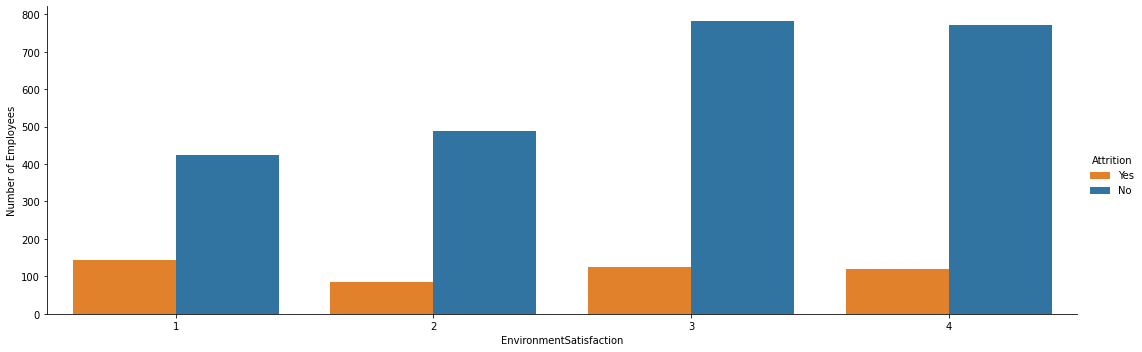

In [ ]:
drawBarChart('EnvironmentSatisfaction')

Insights:

*   Employee with less Environment Statisfaction have higher Attrition

### Education Feature

3    1144
4     796
2     564
1     340
5      96
Name: Education, dtype: int64

Attrition        No       Yes
Education                    
1          0.817647  0.182353
2          0.843972  0.156028
3          0.826923  0.173077
4          0.854271  0.145729
5          0.895833  0.104167
All        0.838776  0.161224


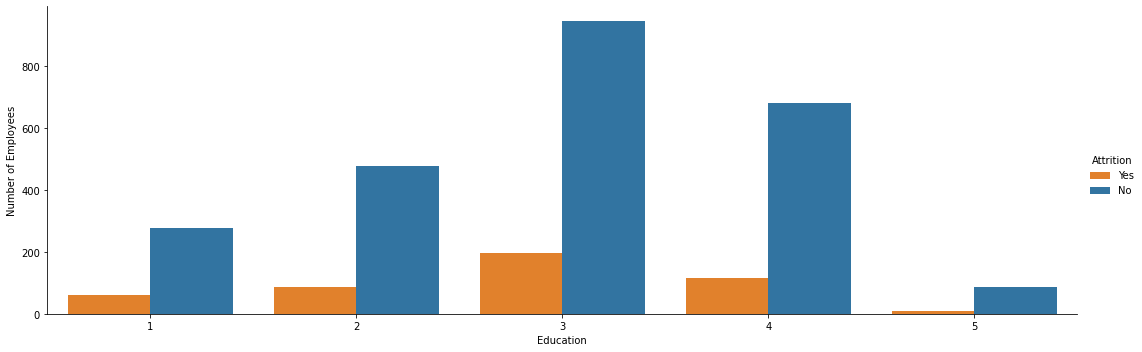

In [ ]:
drawBarChart('Education')

Insights:

*   As it mentioned it's ordinal data type which means Education class 5 epmployee having higher degree holder
*   Education class 1 has higher Attrition rate followed by 2,3,4,5, which means company don't give attention to who has less qualifation
*   Even though Attrition Rate for all Education class is almost same except class 5
*   This feature will have less effect on Attrition

### Job Involvement Feature

3    1736
2     750
4     288
1     166
Name: JobInvolvement, dtype: int64

Attrition             No       Yes
JobInvolvement                    
1               0.662651  0.337349
2               0.810667  0.189333
3               0.855991  0.144009
4               0.909722  0.090278
All             0.838776  0.161224


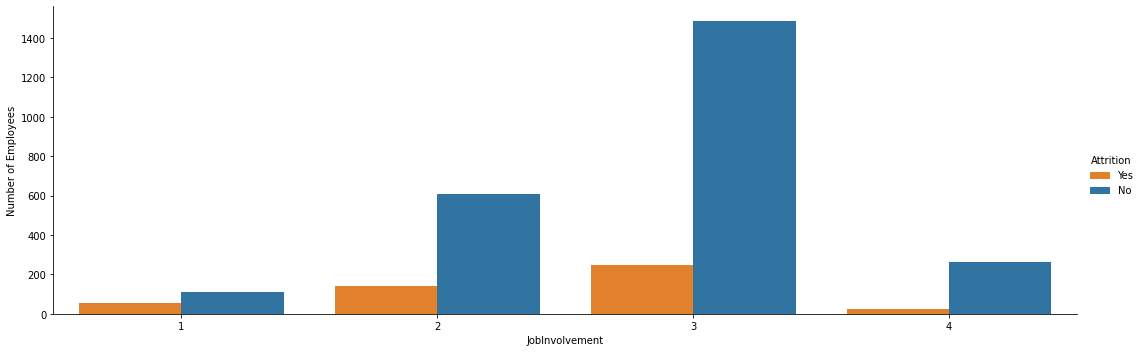

In [ ]:
drawBarChart('JobInvolvement')

Insights:

*   Attrition rate is high if Job involvement is less.

### Monthly Income Feature

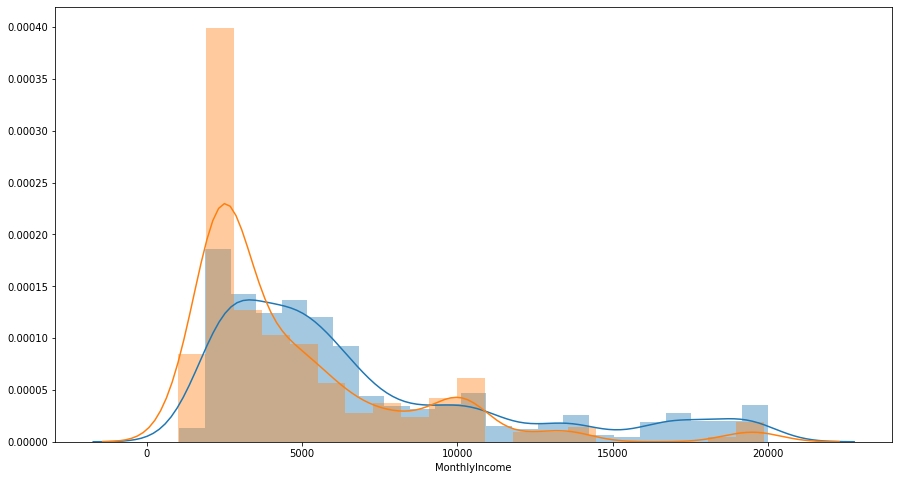

In [ ]:
#Monthly Income feature
attrn = df[df['Attrition']=='No']['MonthlyIncome']
attry = df[df['Attrition']=='Yes']['MonthlyIncome']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

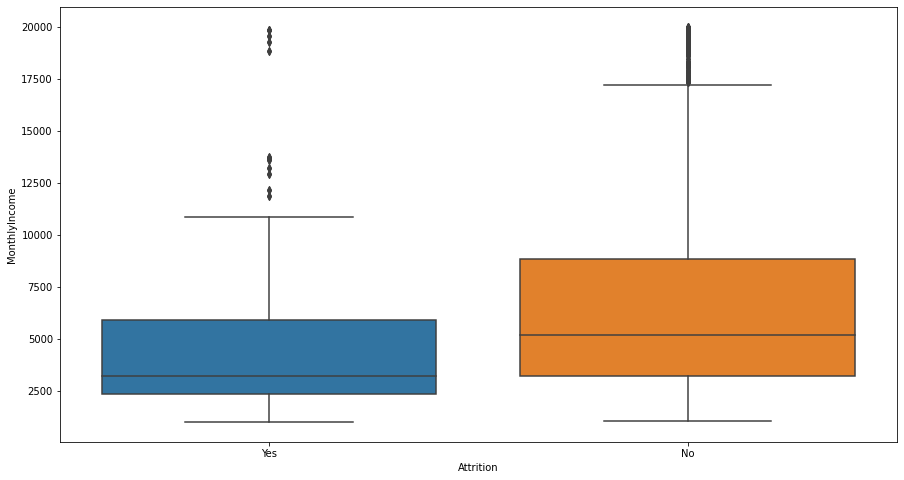

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["MonthlyIncome"])

Insights:

*   Those employees who fall under 1000-2000 there attrition rate is very high. I seems like they don't want to stay at all
*   Median is also less for those who have Attrition yes i.e. less monthly salary leads to Attrition
*   Those who are earning less their attrition rate is high

### MonthlyRate Feature

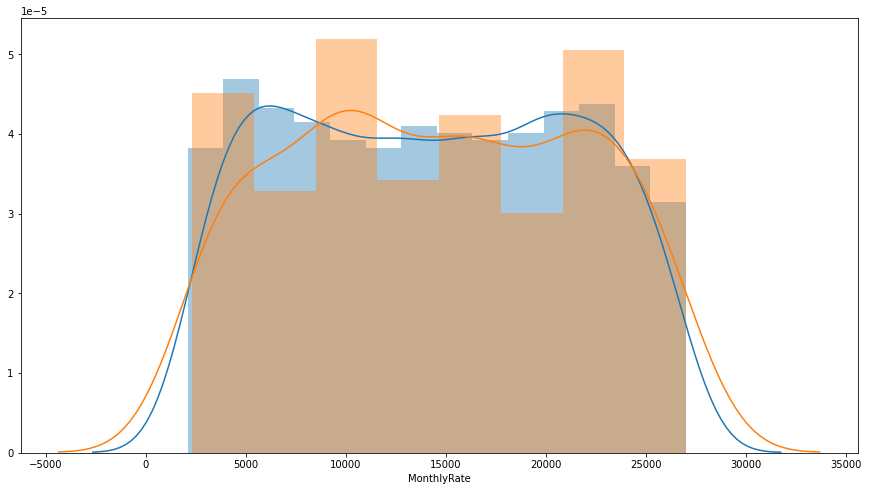

In [ ]:
attrn = df[df['Attrition']=='No']['MonthlyRate']
attry = df[df['Attrition']=='Yes']['MonthlyRate']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

The above doesn't show much insight, let's draw box plot

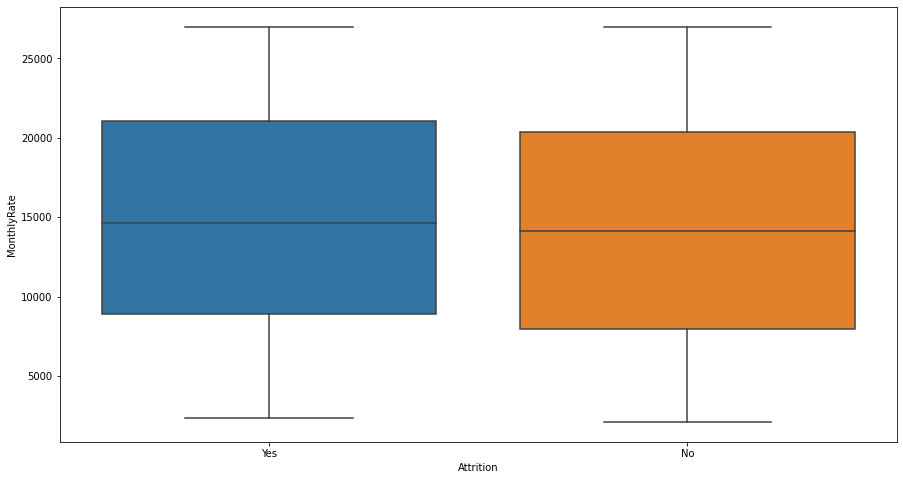

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["MonthlyRate"])

Monthlyrate Median for Attrition is slightly high.

In [ ]:
#Hourly rate mean and standard deviation
print(df.MonthlyRate.mean())
print(np.std(df.MonthlyRate))

14313.103401360544
7115.364616521267


In [ ]:
#Hourly rate mean and standard deviation if attrition is Yes
print(df[df['Attrition']=='Yes']['MonthlyRate'].mean())
print(np.std(df[df['Attrition']=='Yes']['MonthlyRate']))

14559.308016877638
7192.930114415409


In [ ]:
#Hourly rate mean and standard deviation if attrition is No
print(df[df['Attrition']=='No']['MonthlyRate'].mean())
print(np.std(df[df['Attrition']=='No']['MonthlyRate']))

14265.779399837795
7099.380091850406


Insights:

*   As we can Monthly rate have similar distribution for both Attrition classes because mean and standard deviation is very colse
*   It seems to have very little effect on Attrition

1    1042
0     394
3     318
2     292
4     278
7     148
6     140
5     126
9     104
8      98
Name: NumCompaniesWorked, dtype: int64

Attrition                 No       Yes
NumCompaniesWorked                    
0                   0.883249  0.116751
1                   0.811900  0.188100
2                   0.890411  0.109589
3                   0.899371  0.100629
4                   0.877698  0.122302
5                   0.746032  0.253968
6                   0.771429  0.228571
7                   0.770270  0.229730
8                   0.877551  0.122449
9                   0.769231  0.230769
All                 0.838776  0.161224


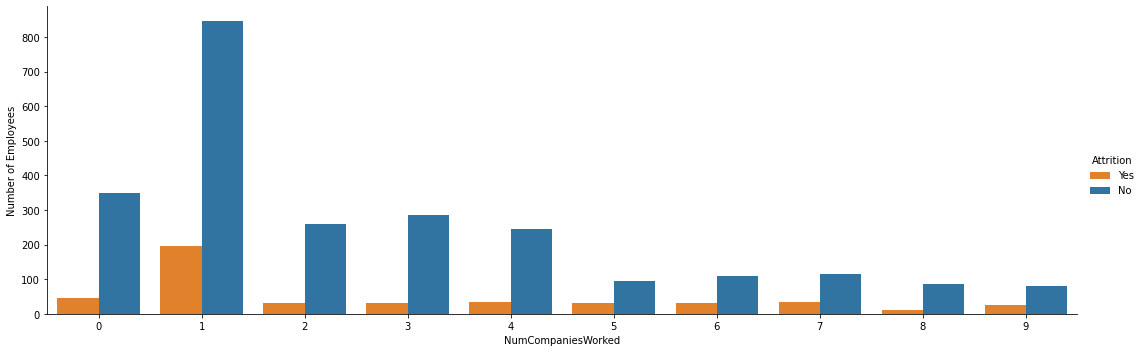

In [ ]:
drawBarChart('NumCompaniesWorked')

### Percent Salary Hike Feature

11    420
13    418
14    402
12    396
15    202
18    178
17    164
16    156
19    152
22    112
20    110
21     96
23     56
24     42
25     36
Name: PercentSalaryHike, dtype: int64

Attrition                No       Yes
PercentSalaryHike                    
11                 0.804762  0.195238
12                 0.833333  0.166667
13                 0.837321  0.162679
14                 0.880597  0.119403
15                 0.821782  0.178218
16                 0.820513  0.179487
17                 0.829268  0.170732
18                 0.853933  0.146067
19                 0.881579  0.118421
20                 0.872727  0.127273
21                 0.895833  0.104167
22                 0.785714  0.214286
23                 0.785714  0.214286
24                 0.714286  0.285714
25                 0.944444  0.055556
All                0.838776  0.161224


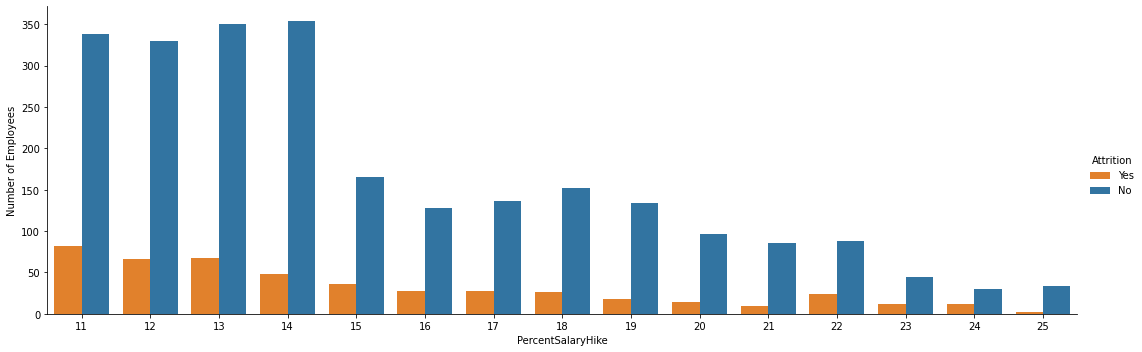

In [ ]:
drawBarChart('PercentSalaryHike')

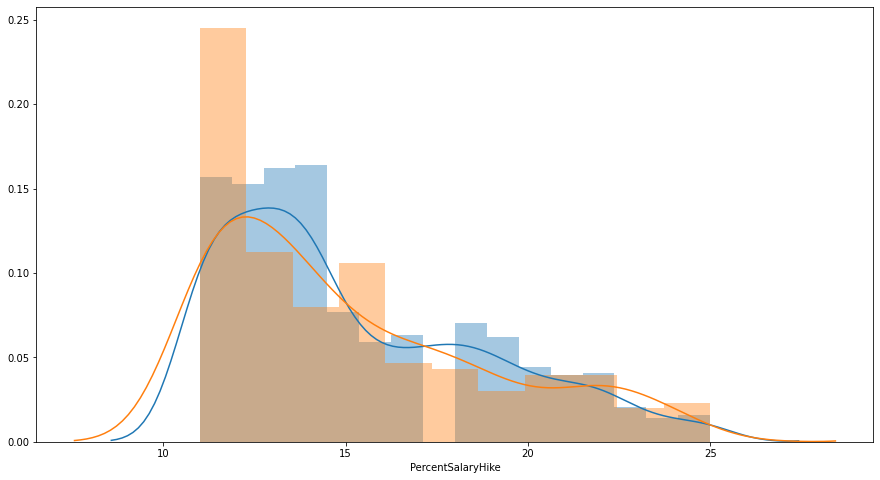

In [ ]:
attrn = df[df['Attrition']=='No']['PercentSalaryHike']
attry = df[df['Attrition']=='Yes']['PercentSalaryHike']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

3    2488
4     452
Name: PerformanceRating, dtype: int64

Attrition                No       Yes
PerformanceRating                    
3                  0.839228  0.160772
4                  0.836283  0.163717
All                0.838776  0.161224


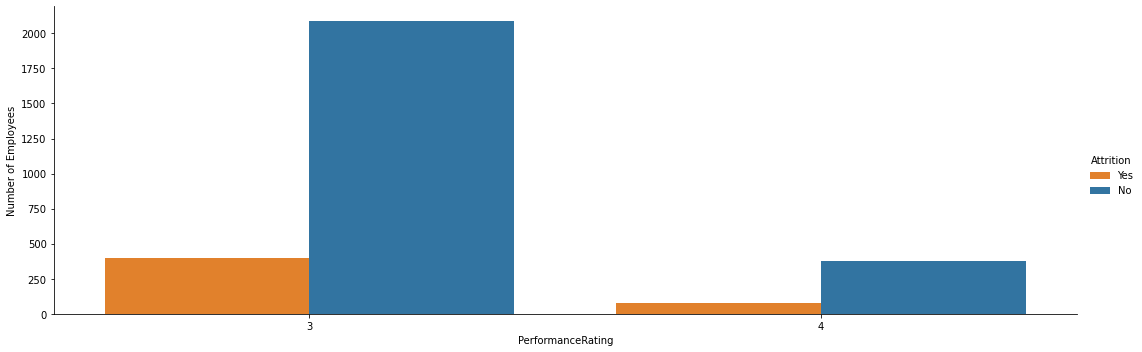

In [ ]:
drawBarChart('PerformanceRating')

Insights:

*   Attrition Rate is almost same for both rating
*   PerformanceRating doesn't show much effect on Attrition

### Relationship Satisfaction Feature

3    918
4    864
2    606
1    552
Name: RelationshipSatisfaction, dtype: int64

Attrition                       No       Yes
RelationshipSatisfaction                    
1                         0.793478  0.206522
2                         0.851485  0.148515
3                         0.845316  0.154684
4                         0.851852  0.148148
All                       0.838776  0.161224


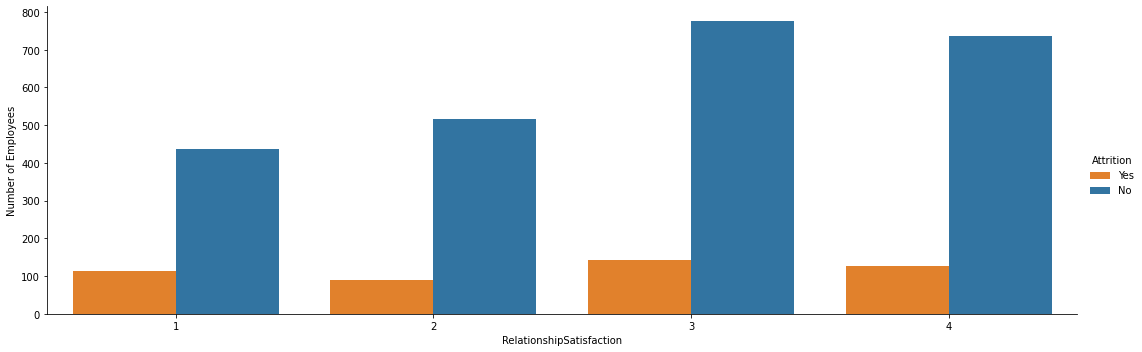

In [ ]:
drawBarChart('RelationshipSatisfaction')

Insights:

*   Relationship Satisfaction doesn't play vital role in Attrition
*   Though low Relationship Satisfaction has littile more attrition but not major difference.

###Stock Option Level Feature

0    1262
1    1192
2     316
3     170
Name: StockOptionLevel, dtype: int64

Attrition               No       Yes
StockOptionLevel                    
0                 0.755943  0.244057
1                 0.906040  0.093960
2                 0.924051  0.075949
3                 0.823529  0.176471
All               0.838776  0.161224


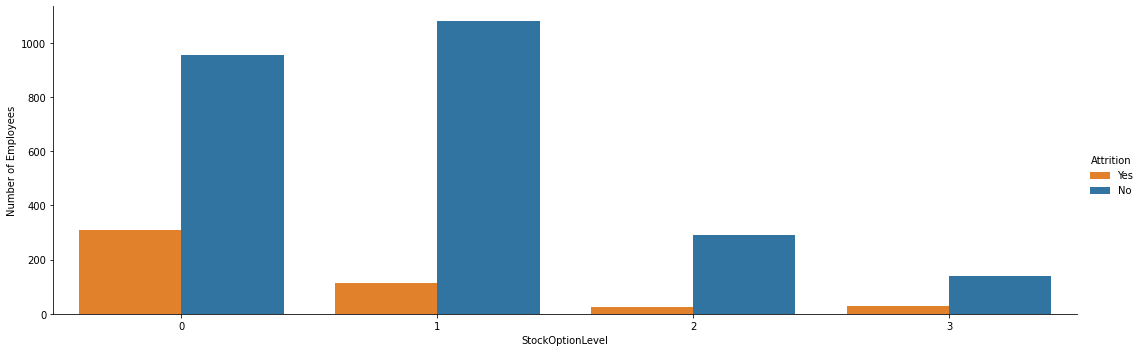

In [ ]:
drawBarChart('StockOptionLevel')

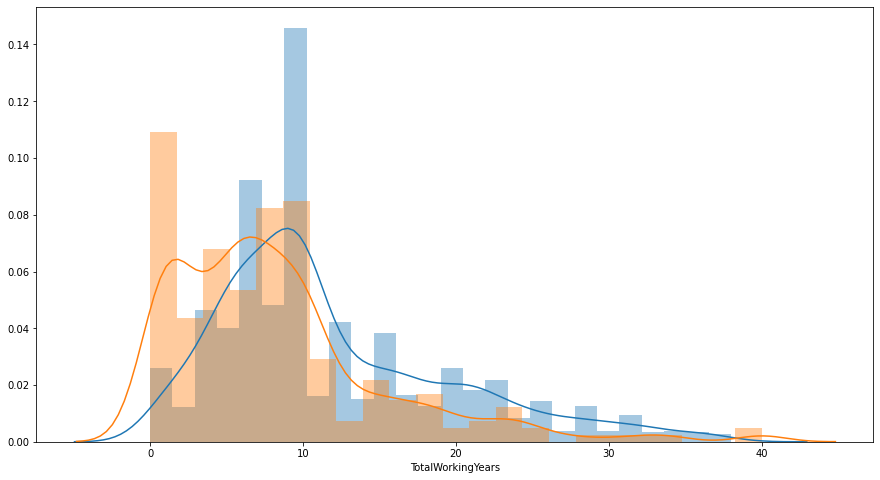

In [ ]:
attrn = df[df['Attrition']=='No']['TotalWorkingYears']
attry = df[df['Attrition']=='Yes']['TotalWorkingYears']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

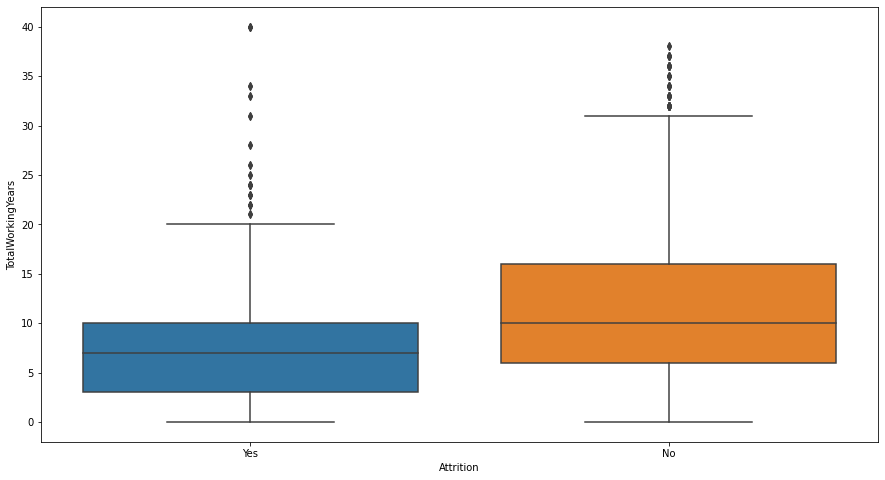

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["TotalWorkingYears"])

Insights:

*   Attrition rate high for those who have less working experience



###Training Times Last Year Feature

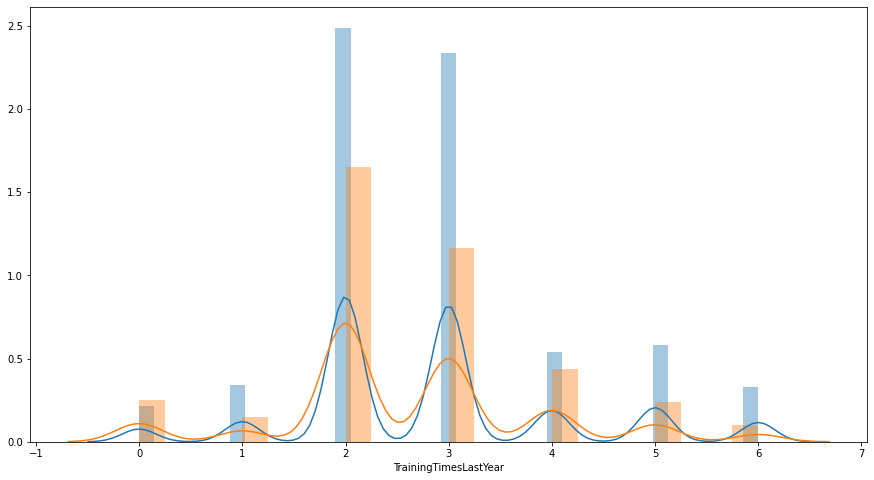

In [ ]:
attrn = df[df['Attrition']=='No']['TrainingTimesLastYear']
attry = df[df['Attrition']=='Yes']['TrainingTimesLastYear']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

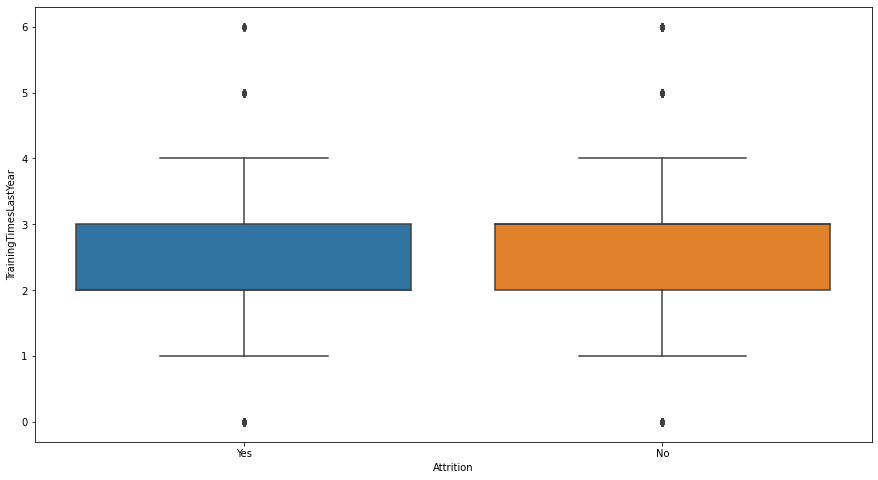

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["TrainingTimesLastYear"])

Insights:
*   Doesn't show effect on Attrition



3    1786
2     688
4     306
1     160
Name: WorkLifeBalance, dtype: int64

Attrition              No       Yes
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471
All              0.838776  0.161224


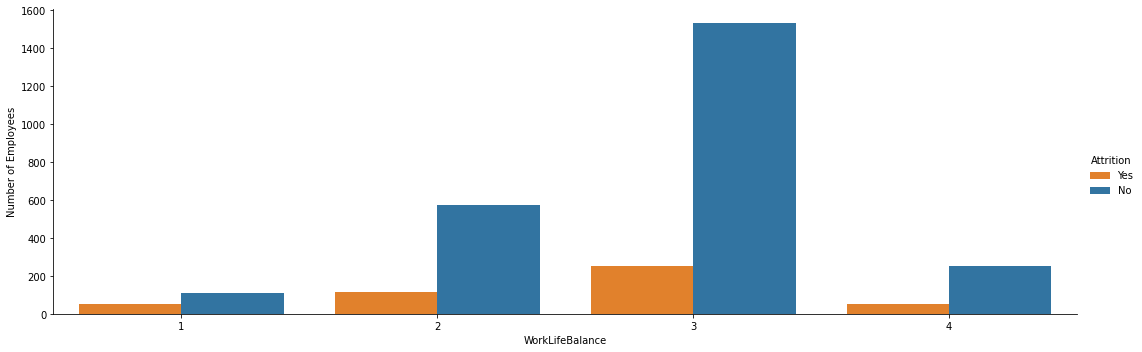

In [ ]:
drawBarChart('WorkLifeBalance')

Insights:

*   Less work life balance higher Attrition rate



###Years At Company Feature

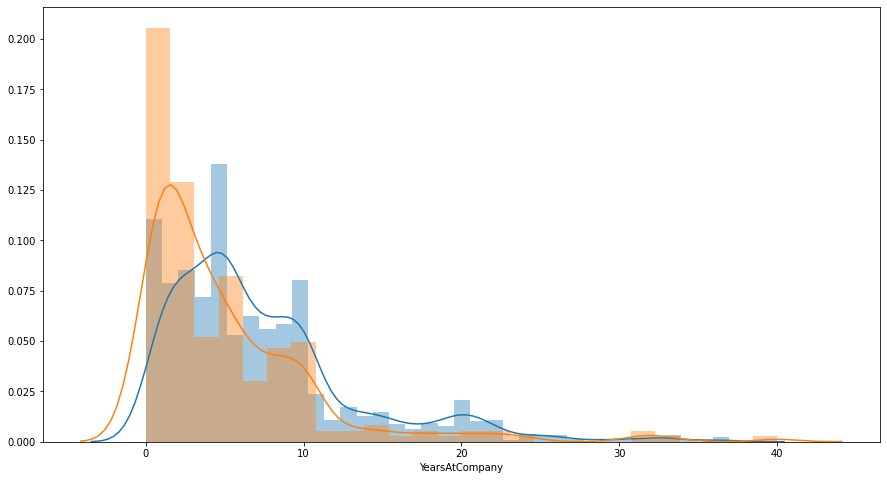

In [ ]:
#YearsAtCompany
attrn = df[df['Attrition']=='No']['YearsAtCompany']
attry = df[df['Attrition']=='Yes']['YearsAtCompany']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

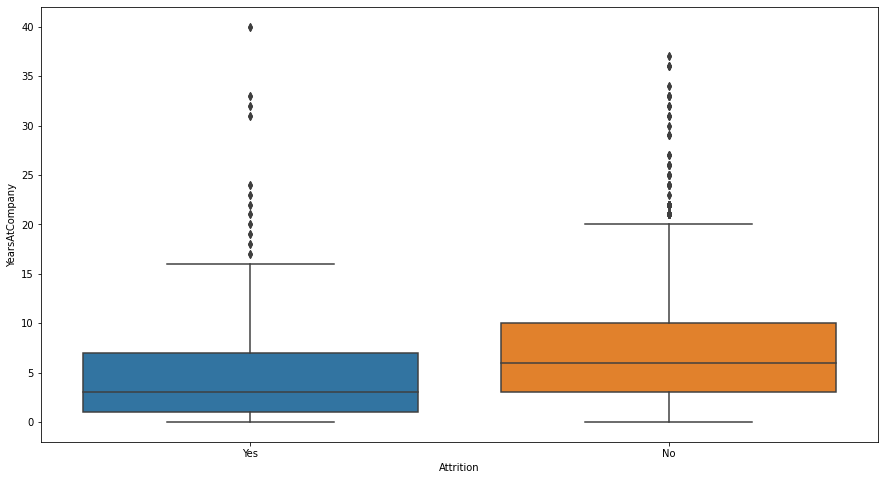

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["YearsAtCompany"])

Inights:

*   Those who has less year experience have high Attrition rate.



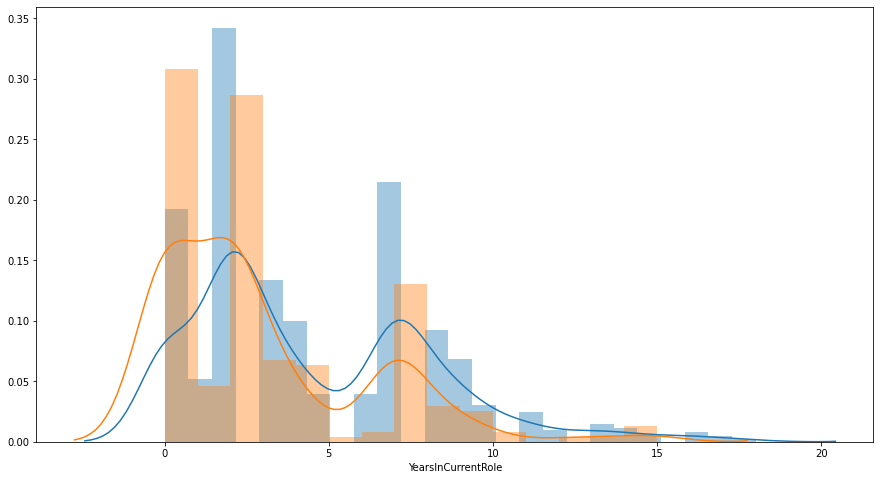

In [ ]:
#YearsInCurrentRole
#YearsAtCompany
attrn = df[df['Attrition']=='No']['YearsInCurrentRole']
attry = df[df['Attrition']=='Yes']['YearsInCurrentRole']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

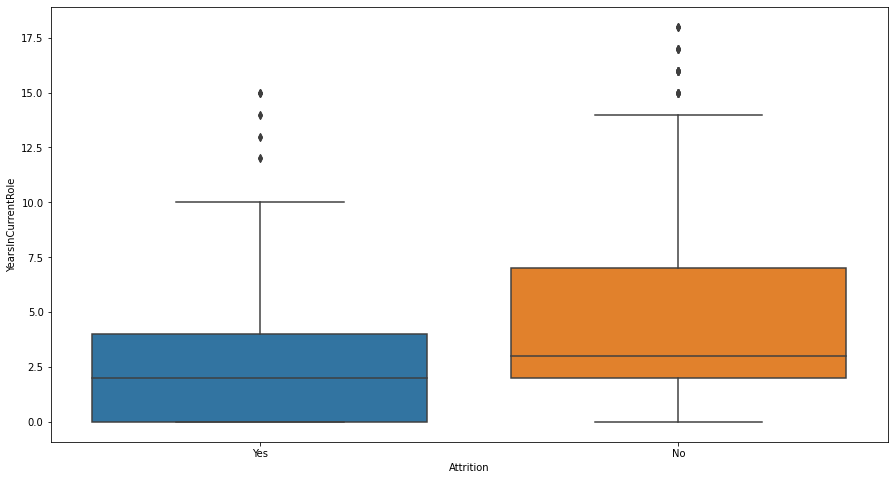

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["YearsInCurrentRole"])

Insights:

*   Those who stays 0-3 years in same role tends to more Attrition
*   Also median is lesser those who have Attrion

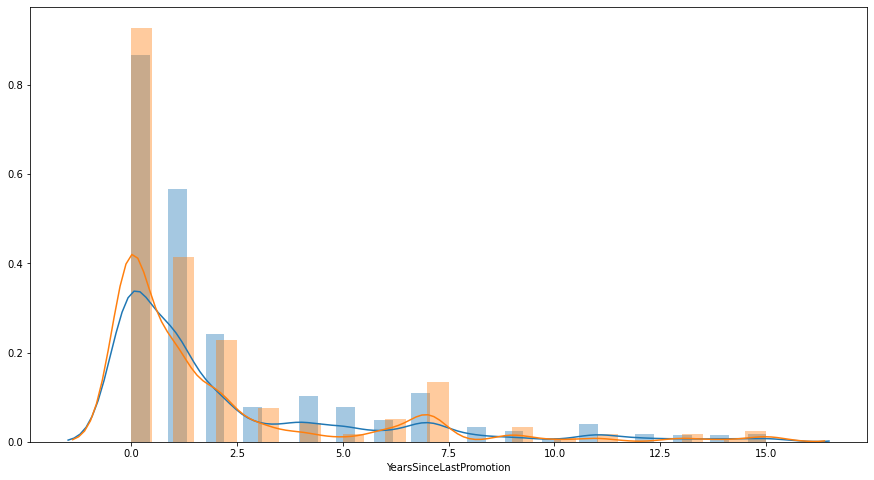

In [ ]:
attrn = df[df['Attrition']=='No']['YearsSinceLastPromotion']
attry = df[df['Attrition']=='Yes']['YearsSinceLastPromotion']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

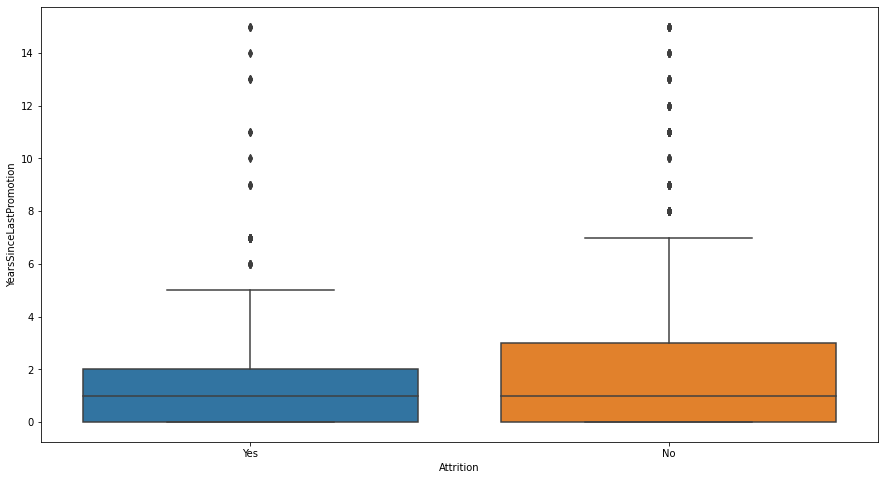

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["YearsSinceLastPromotion"])

Insights:

*   Those who do not get promotion last three years have more Attrition rate 

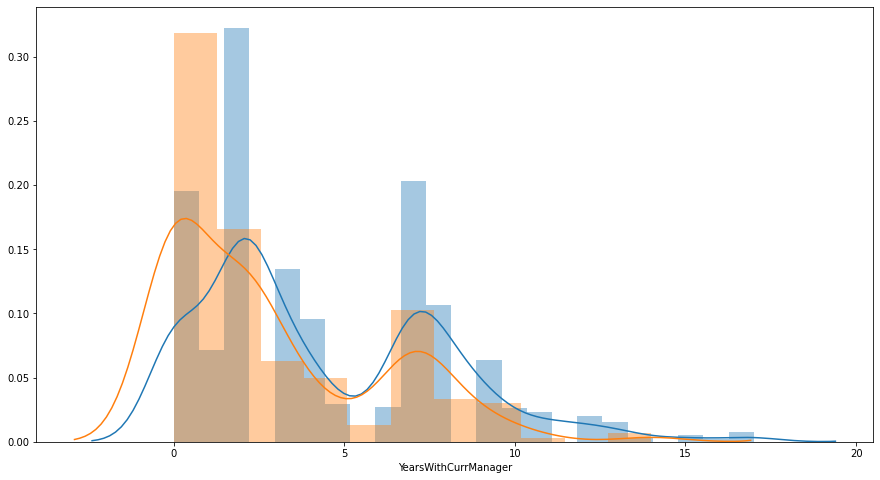

In [ ]:
#YearsWithCurrManager
attrn = df[df['Attrition']=='No']['YearsWithCurrManager']
attry = df[df['Attrition']=='Yes']['YearsWithCurrManager']

plt.figure(figsize=(15,8))
sns.distplot(attrn)
sns.distplot(attry)

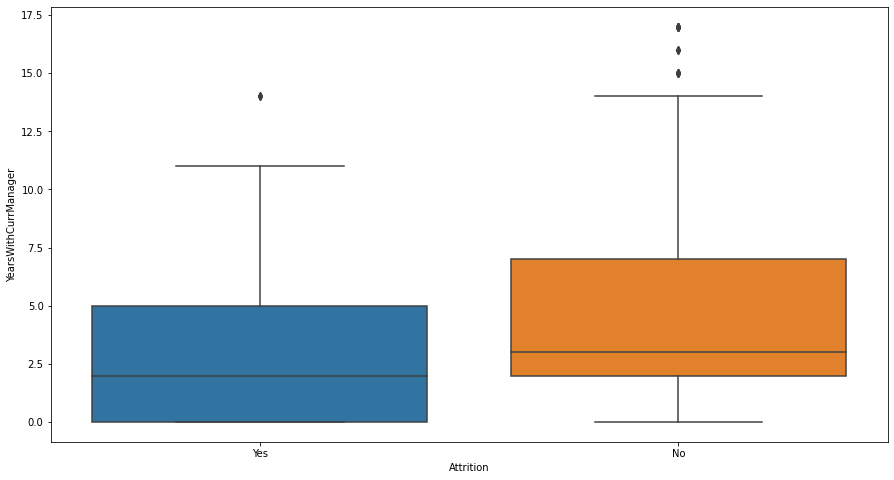

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["Attrition"], y=df["YearsWithCurrManager"])

# Data Pre-processing

##### Data set contains few features which have no use. let's drop those features

In [9]:
df2 = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours',], axis=1)

In [10]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    
    return res_df

In [11]:
encoded_df = preprocessor(df2)
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [12]:
X,y = encoded_df.drop(['Attrition'],axis =1), encoded_df['Attrition']

In [13]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
2936,39,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
2937,27,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
2938,49,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


###Feature Selection Importance using RandomForestClassifier

In [14]:
# use RandomForestClassifier to look for important key features
rfc = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X, y)

In [15]:
def variable_importance(fit):

    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [16]:
var_imp_rf = variable_importance(rfc_model)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [17]:
def variable_importance_plot(importance, indices, name_index):

    #names_index = 
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(20, 10))

    plt.title('Feature importances for Random Forest Model\\n(HR Employee Attrition)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

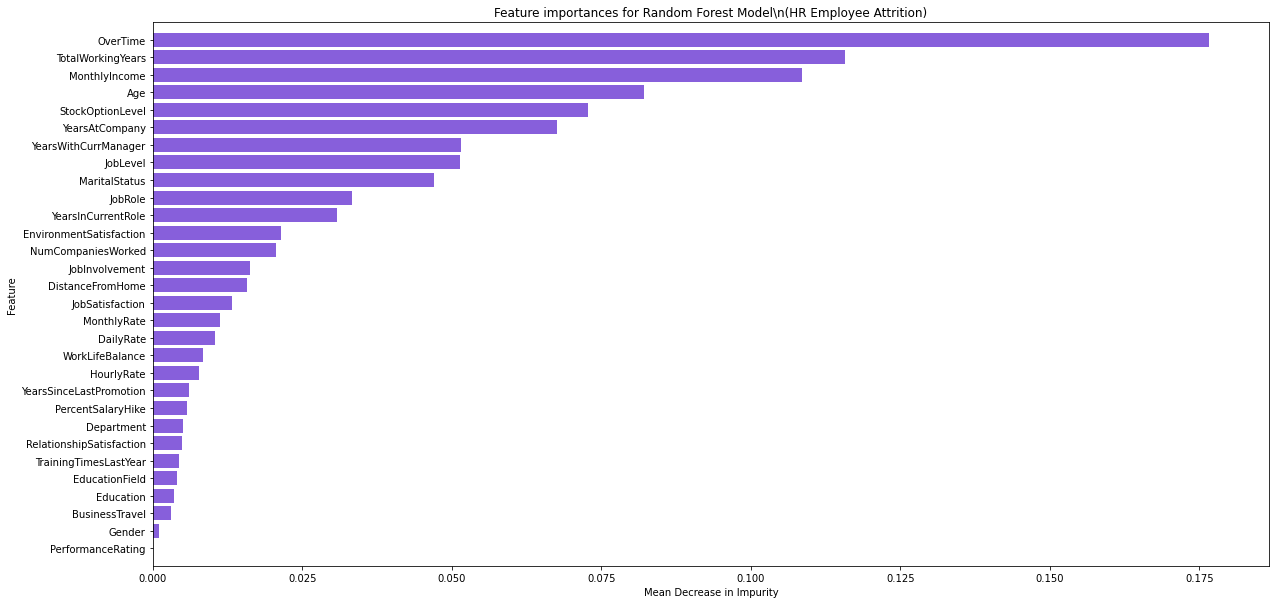

In [18]:
names_index = X.columns
variable_importance_plot(importances_rf, indices_rf, names_index)

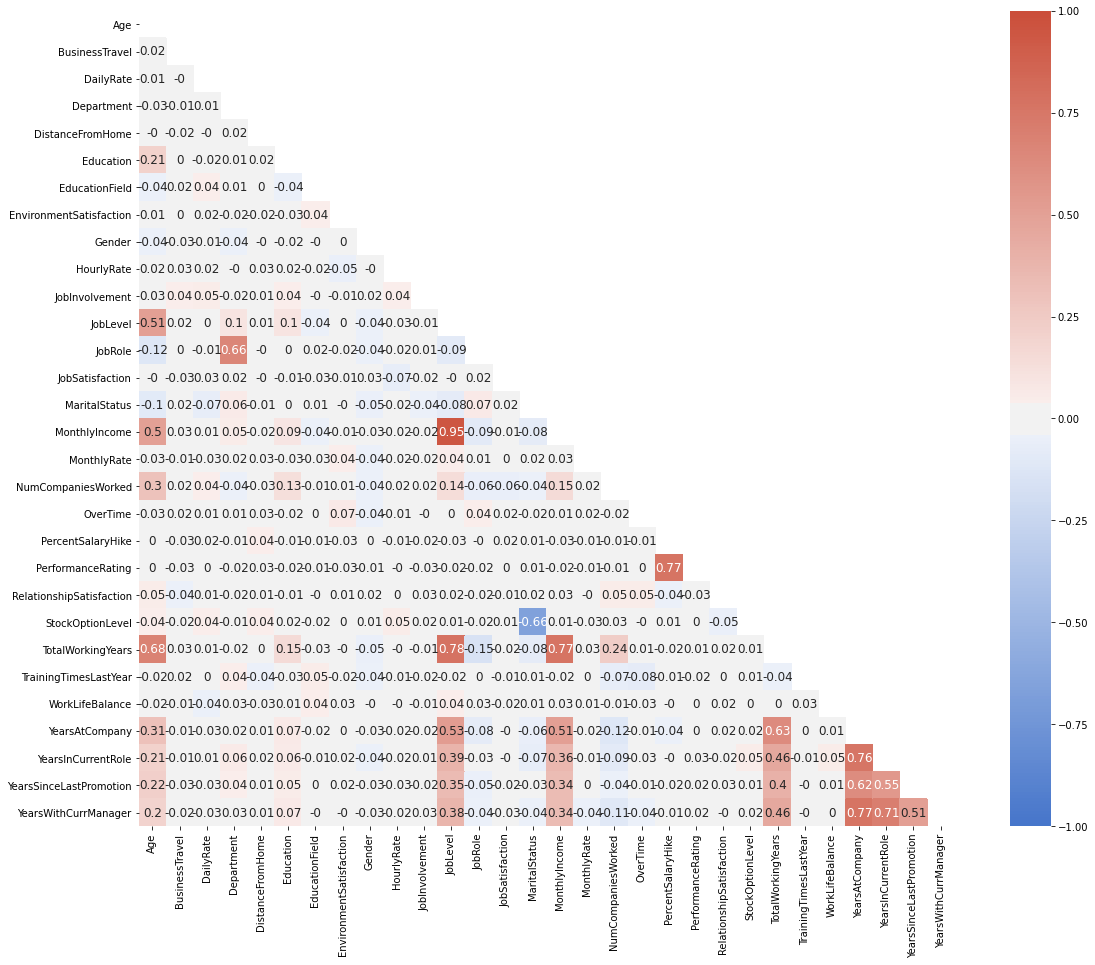

In [19]:
f, ax = plt.subplots(figsize=(20, 15))
corr = X.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            mask=mask, 
            cmap=sns.diverging_palette(255, 17, as_cmap=True),
            square=True, vmin=-1, vmax=1, annot=True, annot_kws={"size": 12}, ax=ax)

As we can see:

*   MonthlyIncome with Joblevel have high correlation ~0.95, 'll dropping Job level because less feature importance
*   PercentSalaryHike with PerformanceRating ~ 0.77 , 'll dropping PerformanceRating because less feature importance
*   TotalWorkingYears with MonthlyIncome ~ 0.77 , 'll dropping TotalWorkingYears because less feature importance
*   YerasInCurrentRole with YearsAtCompany ~ 0.76 , 'll drpping YerasInCurrentRole because less feature importance
*   YerasWithCurrManager with YearsAtCompany ~ 0.77 , 'll drpping YerasWithCurrManager because less feature importance

In [20]:
X = X.drop(['JobLevel','PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis=1)

Let's drop some more features which are playing very less effect on Attrition

In [21]:
X = X.drop(['Gender','BusinessTravel', 'Education', 'EducationField', 'TrainingTimesLastYear','Department','PercentSalaryHike','WorkLifeBalance','HourlyRate','DailyRate','MonthlyRate'], axis=1)

In [22]:
X.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

###Standardization & One hot coding of Features

As we have numerical fetaure and have different scale so we will standarize at same scale.
Also we have categorical nominal and ordinal features. We just need nominal fetures to convert into one hot coding

Let's split fetures based on data type and perform operation

In [23]:
#numerical features
#X_num_features = X[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion']]
X_num_features = X[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','YearsAtCompany','YearsSinceLastPromotion']]

#nominal features
#X_nom_features = X[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']]
X_nom_features = X[['JobRole','MaritalStatus','OverTime']]

#ordinal features
X_ord_features = X[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel']]

As we can see scaling is done using StandardScaler

In [24]:
ss = StandardScaler()
X_num_scaled = pd.DataFrame(ss.fit_transform(X_num_features),columns = X_num_features.columns)
X_num_scaled.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,-1.010909,-0.108350,2.125136,-0.164613,-0.679146
1,1.322365,-0.147150,-0.291719,-0.678049,0.488508,-0.368715
2,0.008343,-0.887515,-0.937654,1.324226,-1.144294,-0.679146
3,-0.429664,-0.764121,-0.763634,-0.678049,0.161947,0.252146
4,-1.086676,-0.887515,-0.644858,2.525591,-0.817734,-0.058285


Also performed One hot coding on nominal data

In [25]:
X_nom_ohot = pd.get_dummies(X_nom_features, columns=X_nom_features.columns)
X_nom_ohot.head()

,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,OverTime_0,OverTime_1
0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,1,0,1,0


Let's combine all the features together 

one very important things we are not going to use one hot coting features when we 'll be using tree based model like Decision tree, random forest etc. Because Continuous variables will be given more importance than the dummy variables by the algorithm which will obscure the order of feature importance resulting in poorer performance

So we will creating two different set of train and test data one for non-tree based and one for tree based

In [26]:
X1_final = pd.concat([X_num_scaled, X_ord_features, X_nom_ohot], axis=1)
X1_final.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,OverTime_0,OverTime_1
0,0.446350,-1.010909,-0.108350,2.125136,-0.164613,-0.679146,2,3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,1.322365,-0.147150,-0.291719,-0.678049,0.488508,-0.368715,3,2,2,4,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.008343,-0.887515,-0.937654,1.324226,-1.144294,-0.679146,4,2,3,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,-0.429664,-0.764121,-0.763634,-0.678049,0.161947,0.252146,4,3,3,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-1.086676,-0.887515,-0.644858,2.525591,-0.817734,-0.058285,1,3,2,4,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [27]:
X2_final = pd.concat([X_num_scaled, X_ord_features, X_nom_features], axis=1)
X2_final.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,JobRole,MaritalStatus,OverTime
0,0.446350,-1.010909,-0.108350,2.125136,-0.164613,-0.679146,2,3,4,1,0,7,2,1
1,1.322365,-0.147150,-0.291719,-0.678049,0.488508,-0.368715,3,2,2,4,1,6,1,0
2,0.008343,-0.887515,-0.937654,1.324226,-1.144294,-0.679146,4,2,3,2,0,2,2,1
3,-0.429664,-0.764121,-0.763634,-0.678049,0.161947,0.252146,4,3,3,3,0,6,1,1
4,-1.086676,-0.887515,-0.644858,2.525591,-0.817734,-0.058285,1,3,2,4,1,2,1,0


As we can see above our data is ready to train model. Now split data into train and test

###Split the Dataset for Training & Testing

In [28]:
def split_train_test(X,y,test_size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=42)# splitted data in 80% train and 20% test ratio
  return X_train, X_test, y_train, y_test

#Logistic Regression model

####Split train and test data

In [48]:
X_train, X_test, y_train, y_test = split_train_test(X1_final,y,0.2)

####Hyper-Parameter Optimization using GridSearchCV

In [176]:
np.random.seed(42)
start = time.time()

model_logreg = LogisticRegression(max_iter=500, random_state=42)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.5,1,10,25,50,100,200], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_clf_acc = GridSearchCV(model_logreg, 
                            param_grid = grid_values,
                            scoring = 'recall',
                            cv = 10,
                            n_jobs = 3)
grid_clf_acc.fit(X_train, y_train)
print('Best Parameters using grid search: \n', grid_clf_acc.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'C': 25, 'penalty': 'l1', 'solver': 'saga'}
Time taken in grid search:  47.71


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [177]:
# instantiate the model (using the default parameters)
model_logreg.set_params(C= 25, 
                        penalty= 'l1', 
                        solver= 'saga')
# fit the model with data
model_logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
model_logreg_score_train =model_logreg.score(X_train, y_train)
print("Training score: ",model_logreg_score_train)
model_logreg_score_test = model_logreg.score(X_test, y_test)
print("Testing score: ",model_logreg_score_test)

Training score:  0.8698979591836735
Testing score:  0.8843537414965986


In [179]:
y_pred=model_logreg.predict(X_test)

####Performance Metrics

In [43]:
def plot_confusionmatrix(y_test, y_pred):
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [44]:
def plot_auc(X_test, model):
  y_pred_proba = model.predict_proba(X_test)[::,1]
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.plot([0, 1], [0, 1], linestyle='--',)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [45]:
def print_class_report(y_test, y_pred, dx, alg_name):
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(y_test, y_pred))

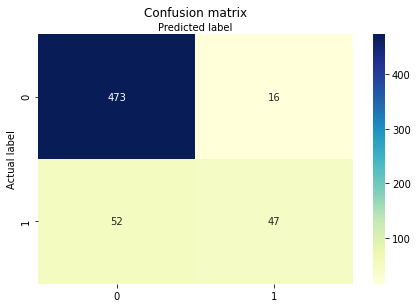

In [183]:
plot_confusionmatrix(y_test, y_pred)

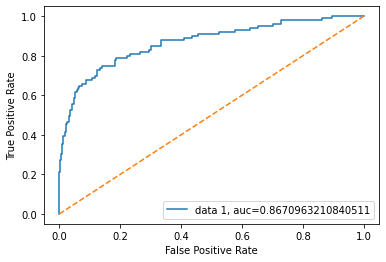

In [184]:
plot_auc(X_test, model_logreg)

In [185]:
dx = ['No', 'Yes']
class_report = print_class_report(y_test, y_pred, dx, 'Logistic Regression')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       489
           1       0.75      0.47      0.58        99

    accuracy                           0.88       588
   macro avg       0.82      0.72      0.76       588
weighted avg       0.87      0.88      0.87       588



In [186]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8843537414965986
Precision: 0.746031746031746
Recall: 0.47474747474747475


#Decision Tree Model

####Split train and test data

In [30]:
X2_train, X2_test, y2_train, y2_test = split_train_test(X2_final,y,0.2)

In [188]:
X2_train.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,JobRole,MaritalStatus,OverTime
456,-0.648668,-0.270544,1.073882,2.525591,-0.327893,-0.679146,3,2,4,3,1,3,0,0
462,-0.320163,1.456975,-0.247736,-0.678049,0.488508,0.873006,4,4,4,4,0,7,2,0
2174,-0.210661,-0.764121,0.280486,1.324226,0.488508,-0.679146,4,3,4,2,1,7,0,0
2669,-0.101159,2.073946,-0.245611,1.324226,-0.654454,-0.679146,1,3,3,2,2,0,1,0
381,-0.758170,-0.887515,-0.855637,-0.678049,-0.981014,-0.679146,3,3,2,1,1,8,1,0


####HyperParameter Optimization using Grid Search

In [189]:
np.random.seed(42)
start = time.time()

model_dt = DecisionTreeClassifier(random_state=42)

grid_values = {'criterion' : ['entropy','gini'],
               'max_depth' : [10,20,30,50,100],
               'max_features' : [10,25,50,100,200],
               'min_samples_leaf' : [1,2,5,10,20], 
               'min_samples_split' : [2,3,4,5,10],
               'ccp_alpha' : [0.0,0.5,1,10,25,50,100]
               }

grid_clf_acc = GridSearchCV(model_dt, 
                            param_grid = grid_values,
                            scoring = 'recall',
                            cv = 10,
                            n_jobs = 3)

grid_clf_acc.fit(X2_train, y2_train)
print('Best Parameters using grid search: \n', grid_clf_acc.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search:  336.94


In [190]:
# Decision tree with depth = 2
model_dt.set_params(max_depth=20, 
                    criterion = "entropy", 
                    max_features= 10)
model_dt.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [191]:
model_dt_score_train = model_dt.score(X2_train, y2_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X2_test, y2_test)
print("Testing score: ",model_dt_score_test)

Training score:  1.0
Testing score:  0.9659863945578231


In [192]:
y_pred=model_dt.predict(X2_test)

####Performance Metrics

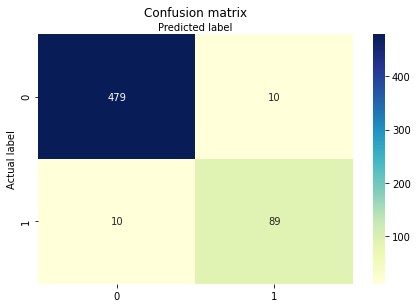

In [193]:
plot_confusionmatrix(y2_test, y_pred)

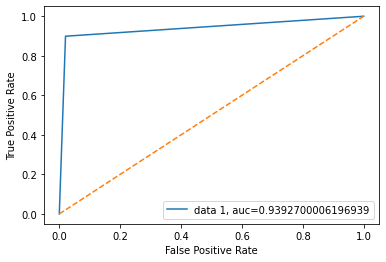

In [194]:
plot_auc(X2_test, model_dt)

In [195]:
dx = ['No', 'Yes']
class_report = print_class_report(y_test, y_pred, dx, 'Decision Tree Classifier')

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       489
           1       0.90      0.90      0.90        99

    accuracy                           0.97       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.97      0.97      0.97       588



In [196]:
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))
print("Precision:",metrics.precision_score(y2_test, y_pred))
print("Recall:",metrics.recall_score(y2_test, y_pred))

Accuracy: 0.9659863945578231
Precision: 0.898989898989899
Recall: 0.898989898989899


#Random forest Classifier Model

####HyperParameter Optimization using Grid Search

In [31]:
fit_rf = RandomForestClassifier(random_state=42)

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4, 8, 10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X2_train, y2_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}
Time taken in grid search:  201.52


In [32]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_depth = 10,
                  max_features= 'auto',
                  bootstrap= True)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#####Finding optimal number of trees

In [33]:
fit_rf.set_params(oob_score=True,
                  warm_start=False)

min_estimators = 200
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X2_train, y2_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [34]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

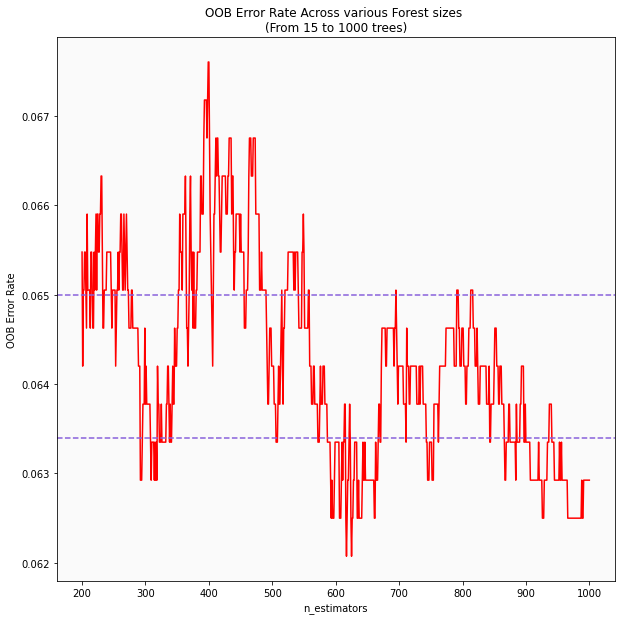

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.065, color='#875FDB',linestyle='--')
plt.axhline(0.0634, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [36]:
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[700]))

OOB Error rate for 300 trees is: 0.06420


In [38]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=700,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
fit_rf.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
fit_rf_score_train = fit_rf.score(X2_train, y2_train)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(X2_test, y2_test)
print("Testing score: ",fit_rf_score_test)

Training score:  0.9842687074829932
Testing score:  0.9302721088435374


In [41]:
y_pred = fit_rf.predict(X2_test)

####Performance Metrics

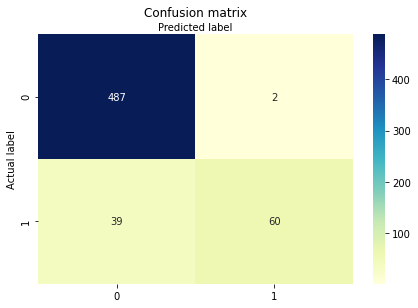

In [46]:
plot_confusionmatrix(y2_test, y_pred)

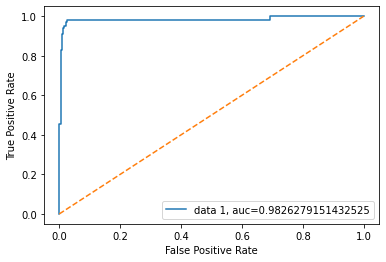

In [50]:
plot_auc(X2_test, fit_rf)

In [52]:
dx = ['No', 'Yes']
class_report = print_class_report(y2_test, y_pred, dx, 'Random Forest Classifier')

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       489
           1       0.97      0.61      0.75        99

    accuracy                           0.93       588
   macro avg       0.95      0.80      0.85       588
weighted avg       0.93      0.93      0.92       588



In [53]:
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))
print("Precision:",metrics.precision_score(y2_test, y_pred))
print("Recall:",metrics.recall_score(y2_test, y_pred))

Accuracy: 0.9302721088435374
Precision: 0.967741935483871
Recall: 0.6060606060606061


#Conclusion

As we can see tree based Algo giving better performance

Decision Tree

Accuracy: 0.9659863945578231,
Precision: 0.898989898989899,
Recall: 0.898989898989899

Random Forest

Accuracy: 0.9302721088435374,
Precision: 0.967741935483871,
Recall: 0.6060606060606061







Decision tree is giving better Performance